In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



df = pd.read_csv('dataset.csv')

# Check data types of each column
print("Data types of each column:")
print(df.dtypes)

# Assuming the dataset contains columns: ['segment1', 'segment2', ..., 'segment7', 'digit']
# Where the first 7 columns are binary values (0 or 1) indicating segment status
# The last column 'digit' is the target digit (0-9)

# Check for NaN values
print("Checking for NaN values in the dataset:")
print(df.isnull().sum())

# Convert Data to Numeric if needed
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

# Split features (X) and target (y)
X = df.iloc[:, :-1].values  # All rows, all columns except the last one (segments input)
y = df.iloc[:, -1].values   # All rows, last column (digit)

# Print features and target
print("Feature matrix (X):")
print(X)
print("Target variable (y):")
print(y)

# One-hot encode the target variable (digits 0-9)
y = to_categorical(y, num_classes=10)  # Converts labels to one-hot encoded format

print("X shape:", X.shape)
print("y shape (after one-hot encoding):", y.shape)

# Check if data is empty
if X.size == 0 or y.size == 0:
    raise ValueError("X or y is empty after preprocessing.")

# Convert data to NumPy arrays with a specific data type (float32)
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data types after train-test split:")
print(f"X_train dtype: {X_train.dtype}, y_train dtype: {y_train.dtype}")

# Check shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Data types of each column:
a    int64
b    int64
c    int64
d    int64
e    int64
f    int64
g    int64
y    int64
dtype: object
Checking for NaN values in the dataset:
a    0
b    0
c    0
d    0
e    0
f    0
g    0
y    0
dtype: int64
Feature matrix (X):
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0]
 [0 0 0 0 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1]
 [0 0 0 1 0 1 0]
 [0 0 0 1 0 1 1]
 [0 0 0 1 1 0 0]
 [0 0 0 1 1 0 1]
 [0 0 0 1 1 1 0]
 [0 0 0 1 1 1 1]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 1]
 [0 0 1 0 0 1 0]
 [0 0 1 0 0 1 1]
 [0 0 1 0 1 0 0]
 [0 0 1 0 1 0 1]
 [0 0 1 0 1 1 0]
 [0 0 1 0 1 1 1]
 [0 0 1 1 0 0 0]
 [0 0 1 1 0 0 1]
 [0 0 1 1 0 1 0]
 [0 0 1 1 0 1 1]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 1]
 [0 0 1 1 1 1 0]
 [0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 1]
 [0 1 0 0 0 1 0]
 [0 1 0 0 0 1 1]
 [0 1 0 0 1 0 0]
 [0 1 0 0 1 0 1]
 [0 1 0 0 1 1 0]
 [0 1 0 0 1 1 1]
 [0 1 0 1 0 0 0]
 [0 1 0 1 0 0 1]
 [0 1 0 1 0 1 0]
 [0 1 0 1 0

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError


In [14]:
# Build the neural network model
#In the Sequential model you have, the input layer is implicitly defined by the input_dim parameter in the first Dense layer.
# Build the neural network model with binary output
model = Sequential([
    Dense(16, input_dim=7, activation='sigmoid'),  # First hidden layer with 16 neurons
    Dense(16, activation='sigmoid'),               # Second hidden layer with 16 neurons
    Dense(1, activation='sigmoid')                 # Single output neuron for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),  # Adjust the learning rate as needed
              loss=MeanSquaredError(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.2124 - loss: 0.2811 - val_accuracy: 0.9000 - val_loss: 0.1947
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9000 - loss: 0.1791 - val_accuracy: 0.9000 - val_loss: 0.1300
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9000 - loss: 0.1231 - val_accuracy: 0.9000 - val_loss: 0.1020
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9000 - loss: 0.0993 - val_accuracy: 0.9000 - val_loss: 0.0926
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9000 - loss: 0.0919 - val_accuracy: 0.9000 - val_loss: 0.0902
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9000 - loss: 0.0901 - val_accuracy: 0.9000 - val_loss: 0.0901
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9000 - loss: 0.0902 - val_accuracy: 0.9000 - val_loss: 0.0905
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9000 - loss: 0.0906 - val_accuracy: 0.9000 - val_loss

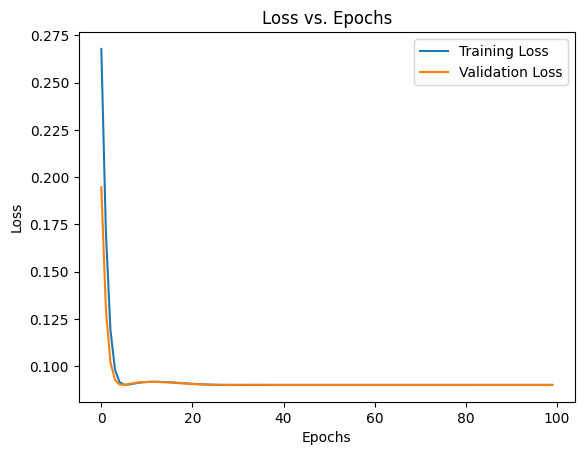

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9000 - loss: 0.0900
Test Loss: 0.09000198543071747
Test Accuracy: 0.8999999761581421
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


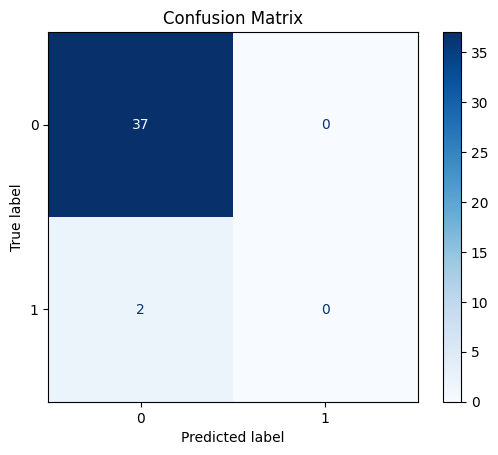

In [17]:
# Plot loss over iterations
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix using binary labels
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix for binary classification
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
